In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
stock_data = pd.read_csv('./eurusd.csv')

In [3]:
stock_data.head()

Date      Open      High       Low     Close  Adj Close  Volume
0  2023-05-11  1.098406  1.099868  1.090132  1.098406   1.098406       0
1  2023-05-12  1.091215  1.093518  1.085564  1.091215   1.091215       0
2  2023-05-15  1.085270  1.089206  1.084858  1.085270   1.085270       0
3  2023-05-16  1.087370  1.090358  1.085670  1.087370   1.087370       0
4  2023-05-17  1.086567  1.087548  1.081163  1.086567   1.086567       0

In [4]:
stock_data.set_index('Date', inplace=True)

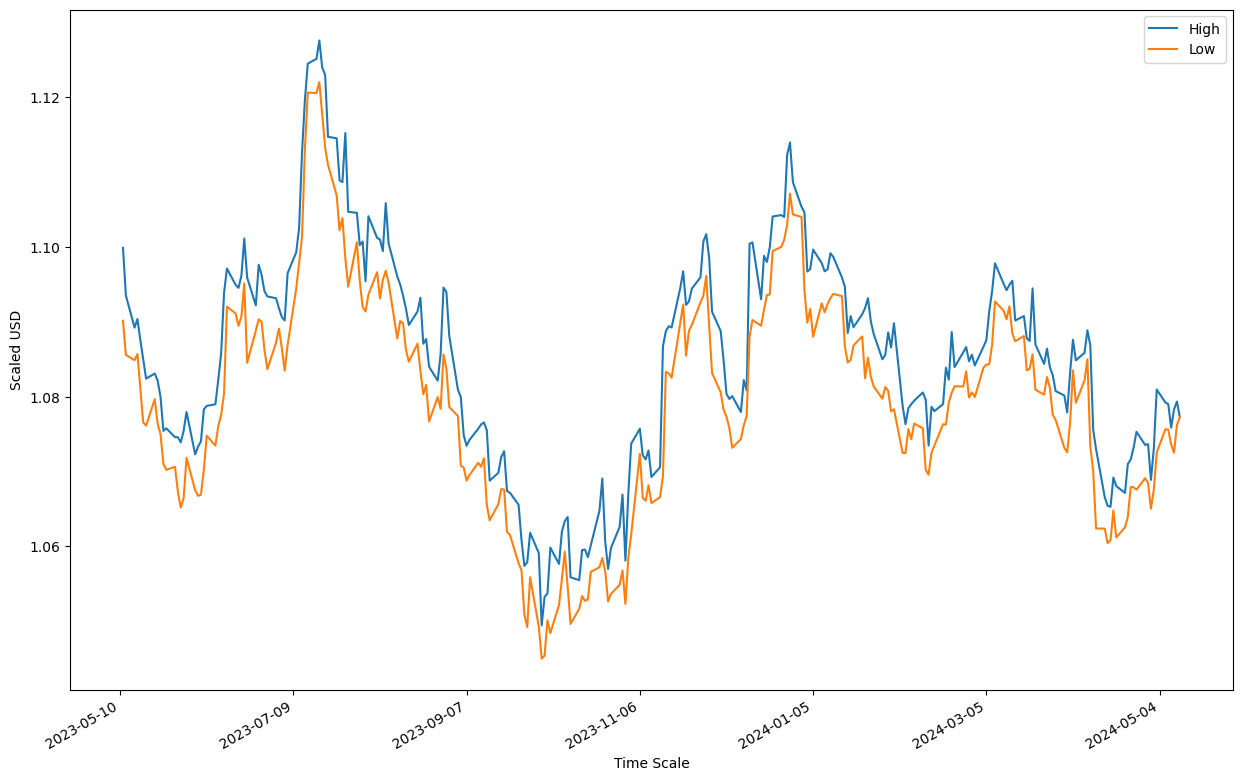

In [5]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [6]:
import numpy as np

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error


In [8]:
target_y = stock_data['Close']
x_feat = stock_data.iloc[:, 0:3]

sc = StandardScaler()
x_ft = sc.fit_transform(x_feat.values)
x_ft = pd.DataFrame(columns=x_feat.columns, data=x_ft, index=x_feat.index)

In [9]:
def lstm_split(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps + 1):
        x.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps - 1, -1])
    return np.array(x), np.array(y)

In [10]:
x1, y1 = lstm_split(stock_data.values, n_steps=2)

In [11]:
train_split = 0.8
split_idx = int(np.ceil(len(x1) * train_split))

In [12]:
date_index = stock_data.index

In [13]:
x_train, x_test = x1[:split_idx], x1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]

In [14]:
x_train_date, x_test_date = date_index[:split_idx], date_index[split_idx:]

In [15]:
print(x1.shape, x_train.shape, x_test.shape, y_test.shape)

(262, 2, 5) (210, 2, 5) (52, 2, 5) (52,)


In [16]:
lstm = Sequential()
lstm.add(LSTM(25, input_shape=(x_train.shape[1], x_train.shape[2]),activation='relu', return_sequences=True))
# lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 25)             3100      
                                                                 
 dense (Dense)               (None, 2, 1)              26        
                                                                 
Total params: 3126 (12.21 KB)
Trainable params: 3126 (12.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = lstm.fit(x_train, y_train, epochs=100, batch_size=4, verbose=2, shuffle=False)
y_pred = lstm.predict(x_test)

Epoch 1/100

53/53 - 5s - loss: 0.0021 - 5s/epoch - 87ms/step
Epoch 2/100
53/53 - 0s - loss: 5.7602e-06 - 163ms/epoch - 3ms/step
Epoch 3/100
53/53 - 0s - loss: 4.5835e-07 - 168ms/epoch - 3ms/step
Epoch 4/100
53/53 - 0s - loss: 2.5779e-07 - 231ms/epoch - 4ms/step
Epoch 5/100
53/53 - 0s - loss: 2.2955e-07 - 164ms/epoch - 3ms/step
Epoch 6/100
53/53 - 0s - loss: 2.3532e-07 - 246ms/epoch - 5ms/step
Epoch 7/100
53/53 - 0s - loss: 2.3599e-07 - 175ms/epoch - 3ms/step
Epoch 8/100
53/53 - 0s - loss: 2.2204e-07 - 182ms/epoch - 3ms/step
Epoch 9/100
53/53 - 0s - loss: 1.9750e-07 - 280ms/epoch - 5ms/step
Epoch 10/100
53/53 - 0s - loss: 1.7062e-07 - 177ms/epoch - 3ms/step
Epoch 11/100
53/53 - 0s - loss: 1.4733e-07 - 258ms/epoch - 5ms/step
Epoch 12/100
53/53 - 0s - loss: 1.2931e-07 - 283ms/epoch - 5ms/step
Epoch 13/100
53/53 - 0s - loss: 1.1591e-07 - 331ms/epoch - 6ms/step
Epoch 14/100
53/53 - 0s - loss: 1.0604e-07 - 290ms/epoch - 5ms/step
Epoch 15/100
53/53 - 0s - loss: 9.8782e-08 - 312ms/epoch - 6ms

In [18]:
y_pred = lstm.predict(x_test)

2/2 [==============================] - 0s 0s/step


In [33]:
arr_without_middle = np.squeeze(y_pred, axis=1)
arr_without_middle.shape

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [32]:
rmse = mean_squared_error(y_test, arr_without_last_reshaped, squared=False)
mape = mean_absolute_percentage_error(y_test, arr_without_last_reshaped)
print('RSME: ', rmse)
print('MAPE: ', mape)


ValueError: y_true and y_pred have different number of output (1!=2)

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(x_test_date, y_test, label='Actual', marker='o')
plt.plot(x_test_date[::2], y_pred, label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Scaled USD')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
